In [1]:
%matplotlib notebook

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import seaborn as sns

# Visualization code

In [3]:
def draw_contour(ax, f, xlow, xhigh, ylow, yhigh):
    x,y = np.meshgrid(np.arange(xlow, xhigh, 0.1), np.arange(ylow, yhigh, 0.1))
    #Slow loop
    z = np.zeros(np.shape(x))
    for i in np.arange(0, np.shape(x)[0]):
        for j in np.arange(0, np.shape(x)[1]):
            z[i,j] = f(np.array((x[i,j],y[i,j])))
    ax.contour(x,y,z, levels=10, alpha=0.2)
    
def draw_search_path(ax, steps):
    linecoll = mpl.collections.LineCollection(zip(steps[:-1], steps[1:]), colors='r')
    linecoll.set_linestyle('-')
    ax.add_collection(linecoll)
    ax.scatter(steps[0][0], steps[0][1], marker='s', c='r') #Start point
    ax.scatter(steps[-1][0], steps[-1][1], marker='*', c='b') #End point
    ax.scatter([pos[0] for pos in steps[1:-1]], [pos[1] for pos in steps[1:-1]], marker='.', c = 'r') #Middle points


def illustrate_search(ax, f, steps, xlow, xhigh, ylow, yhigh):
    draw_contour(ax, f, xlow, xhigh, ylow, yhigh)
    draw_search_path(ax, steps)

In [4]:
class QuadraticObjective(object):
    def __init__(self, a, b, c):
        self.a = a
        self.b = b
        self.c = c
    
    def value(self, p):
        return 0.5 * np.dot(p, np.dot(self.a, p)) + np.dot(self.b, p) + self.c
    
    def grad(self, p):
        return np.dot(self.a, p) + self.b
    
    def hess(self, p):
        return self.a

Algorithms
=========

In [14]:
def backtracking(f, grad, x, d, init_step = 1.0, dec = 0.1, contraction=0.4):
    point = x + init_step * d
    orig_val = f(x)
    orig_grad = grad(x)
    step = init_step
    while f(point) > orig_val + dec * step * np.dot(orig_grad, d):
        step *= contraction
        if step < 1e-20:
            raise 'Invalid backtracking'
    return step

def steepest_descent(f, grad, x_0, tol = 1e-2):
    points = [x_0]
    x =  x_0
    cont = True
    while cont:
        d = -grad(x)
        step = backtracking(f, grad, x, d, init_step = 0.2)
        if step < tol:
            cont = False
        x = x + step * d
        if np.linalg.norm(x - points[-1]) < tol:
            cont = False
        points.append(x)
    return points

def newton(f, grad, hess, x_0, tol = 1e-2):
    points = [x_0]
    x = x_0
    cont = True
    while cont:
        d = -np.dot(np.linalg.inv(hess(x)), grad(x)) #Never do this, by the way
        step = backtracking(f, grad, x, d, init_step = 1.0)
        if step < tol:
            cont = False
        x = x + step * d
        if np.linalg.norm(x - points[-1]) < tol:
            cont = False
        points.append(x)
    return points   

def fake_algorithm():
    return [[-2,0],[-1,-1],[3,-1]]

Algorithm tests
==============

In [15]:
simple_quad_obj = QuadraticObjective(np.eye(2), np.array([-2.0, 4.0]), 5.0)
stretched_quad_obj = QuadraticObjective(np.array([[10.0,-1.0],[-1.0, 2.0]]), np.array([3.0, 3.0]), 2.0)

<IPython.core.display.Javascript object>


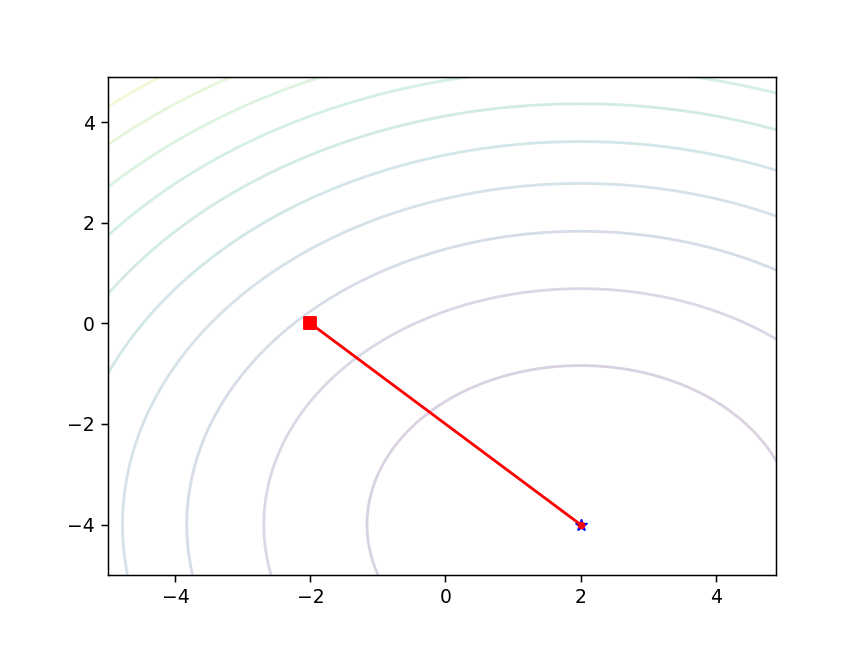

In [16]:
fig, ax = plt.subplots(1,1)
#illustrate_search(ax, simple_quad_obj.value, fake_algorithm(), -5, 5, -5, 5)
#illustrate_search(ax, simple_quad_obj.value, 
#                  steepest_descent(simple_quad_obj.value, simple_quad_obj.grad, np.array([-2.0,0.0])),
#                  -5, 5, -5, 5)
illustrate_search(ax, simple_quad_obj.value, 
                  newton(simple_quad_obj.value, simple_quad_obj.grad, simple_quad_obj.hess, np.array([-2.0,0.0])),
                  -5, 5, -5, 5)
plt.draw()
plt.show()

<IPython.core.display.Javascript object>


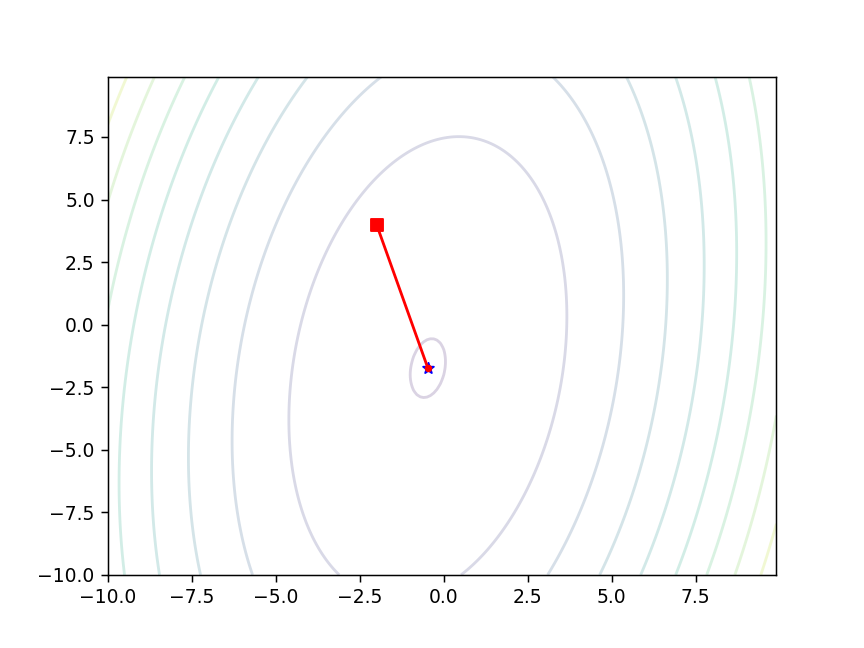

In [19]:
fig, ax = plt.subplots(1,1)
#illustrate_search(ax, stretched_quad_obj.value, fake_algorithm(), -10, 10, -10, 10)
#illustrate_search(ax, stretched_quad_obj.value, 
#                  steepest_descent(stretched_quad_obj.value, stretched_quad_obj.grad, np.array([-2.0,0.0])),
#                  -10, 10, -10, 10)
illustrate_search(ax, stretched_quad_obj.value, 
                  newton(stretched_quad_obj.value, stretched_quad_obj.grad, stretched_quad_obj.hess, np.array([-2.0,4.0])),
                  -10, 10, -10, 10)
plt.draw()
plt.show()